In [42]:
import matplotlib.pyplot as plt
import numpy as np

- M represents the number of devices contending for random access in the channel.
- N represents the total number of available RAOs in the random access channel.


In [43]:

def generate_poisson(average, size):
    poisson_values = np.random.poisson(average, size)
    sorted_values = np.sort(poisson_values)
    return sorted_values




In [181]:
def NSi(k, n):
    # Ensure k and n are numpy arrays for element-wise operations
    k = np.array(k)
    n = np.array(n)

    # Calculate the NSi values for each pair of k and n
    results = k * np.exp(-k / n)

    return results


def NCi(k, n):
     # Ensure k and n are numpy arrays for element-wise operations
    k = np.array(k)
    n = np.array(n)
    results = n - k*np.exp(-k/n) - n*np.exp(-k/n)
    return results

def k_array(k0, N, i):
    k = np.array(np.zeros(i))
    k[0] = k0
    for j in range(1, i-1):
        k[j] = k[j-1]*(1-np.exp(-k[j-1]/N))
    return k


In [229]:
kpern=1
ntest=3
test = k_array(kpern*ntest,ntest,10)
print(test)
RAO = NSi(test,ntest)
print(RAO)
print(np.sum(RAO))

[3.00000000e+00 1.89636168e+00 8.88514463e-01 2.27761896e-01
 1.66517249e-02 9.21706105e-05 2.83176364e-09 2.67296163e-18
 0.00000000e+00 0.00000000e+00]
[1.10363832e+00 1.00784721e+00 6.60752566e-01 2.11110171e-01
 1.65595543e-02 9.21677787e-05 2.83176364e-09 2.67296163e-18
 0.00000000e+00 0.00000000e+00]
3.0


### RAO Equation

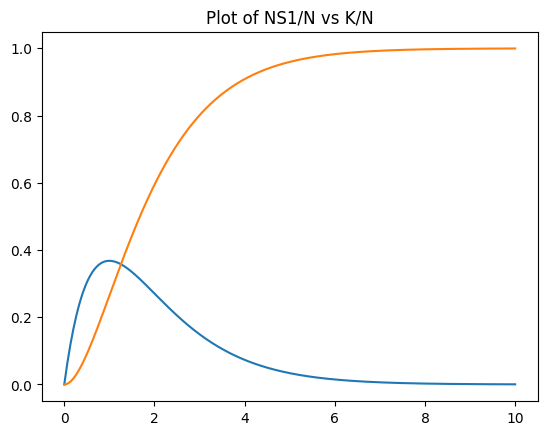

In [108]:

# NCi= N - K*np.exp(-K/N) - N1*np.exp(-K/N)

plt.title('Plot of NS1/N vs K/N')

for N in [3]:
    K = np.linspace(0, 10*N, 100*N)
    NS1 = NSi(K, N)  # Compute NS1 inside the loop
    NC1 = NCi(K, N)  # Compute NS1 inside the loop
    plt.plot(K/N, NS1/N, label=f'Equation 4')
    plt.plot(K/N, NC1/N, label=f'Equation 5')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.536489623982874
8.53648962

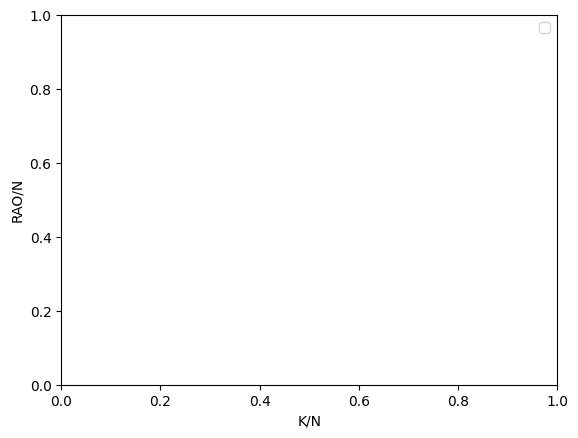

In [167]:

for N in [3]:
    M = np.linspace(0, 10*N, 100*N+1)
    RAO = np.zeros(np.size(M))
    for i in range(np.size(M)):
        k_iter = k_array(9, N, N)
        print(k_iter.sum()/3)
        RAO[i] = k_iter.sum()
    #print(RAO)
# Adding labels and title
plt.xlabel('K/N')
plt.ylabel('RAO/N')

# Show legend
plt.legend()

# Display the plot
plt.show()